<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/28%20-%20Pr%C3%A9traitement%20de%20donn%C3%A9es%20(Corrig%C3%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [111]:
url = 'https://raw.githubusercontent.com/JQnicoKA/data/main/covid.csv'
#url = 'data/covid.csv'
data = pd.read_csv(url, index_col=0, encoding = "ISO-8859-1")
data.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# PRE-PROCESSING

![Capture%20d%E2%80%99%C3%A9cran%20du%202023-09-22%2020-55-15.png](attachment:Capture%20d%E2%80%99%C3%A9cran%20du%202023-09-22%2020-55-15.png)

## Essai 1

### Procédure Classique :
- **Création des sous-ensembles suite aux EDA**
- **Création du trainset et du testset**
- **Nettoyage avec dropna**
- **Encodage des données object en int**
- **Création de la fonction preprocessing** (nettoyage, encodage et création de X et Y)
- **Modellisation** DecisionTreeClassifier
- **Création de la procédure d'évaluation**
    - Entraînement du modèle avec X_train et y_train créés grâce au preprocessing
    - Impression d'une matrice de confusion
    - Impression d'un classification report
    - Impression graphique de learning curves sur le traintest et le testset

## Essai 2

### fillna au pif:
- **Remplacement de dropna par fillna(valeur aberrante)***

## Essai 3

- **On va ajouter une nouvelle colonne 'is na' qui vaut True si au moins une des deux colonnes (Parainfluenza 3 ou Leukocytes) contient une valeur manquante (NaN)**

## Essai 4

### Sélection de variable basique:
- **Abandon des variables de type virus***

## Essai 5

### Changement de modèle:
- **On reprend les features de type virus***
- **Changement de modèle pour un modèle régularisé qui lutte contre l'overfitting*** (RandomForestClassifier)

## Essai 6

### Sélection de variable avancée:
- **On remplace l'ensemble des features de type virus en un seul feature 'est malade'***
- **On drop donc tous les features de type virus***

## Essai 7

### Sélection de variable assistée:
- **Test statistique pour faire ressortir les features importants : SelectKBest***
- **Création d'un pipeline pour être cohérent entre les données de trainset et testset***

## Essai 8

### Expension polynomiale:
- **Expension polynomiale, pour créer pleins de variables***
- **Suivie d'un SelectKBest***

In [ ]:
df = data.copy()
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Essai 1

## Création des sous-ensembles (suite au EDA)

In [ ]:
missing_rate = df.isna().sum()/df.shape[0]

In [ ]:
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate >0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [ ]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [ ]:
df = df[key_columns + blood_columns + viral_columns]
df.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
Patient ID,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
a46b4402a0e5696,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


## TrainTest - Nettoyage - Encodage

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# On sépare le dataset en deux ensembles trainset et testset
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
# On vérifie si les trainset et testset gardent une proportion de covid positif et négatif acceptables (important)
trainset['SARS-Cov-2 exam result'].value_counts()

,count
SARS-Cov-2 exam result,
negative,4068
positive,447


In [ ]:
testset['SARS-Cov-2 exam result'].value_counts()

,count
SARS-Cov-2 exam result,
negative,1018
positive,111


In [ ]:
def imputation(df):
    return  df.dropna(axis=0)

In [ ]:
# On a observé dans le Data Analysis que les colonnes object avaient 4 groupes
def encodage(df):
    code = {'negative':int(0),
            'positive':int(1),
            'not_detected':int(0),
            'detected':int(1)}

    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')

    return df

In [ ]:
df.dtypes.value_counts()

,count
object,18
float64,14
int64,1


In [ ]:
print(df.select_dtypes(include=['object']).columns)

Index(['SARS-Cov-2 exam result', 'Respiratory Syncytial Virus', 'Influenza A',
       'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63',
       'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2'],
      dtype='object')


In [ ]:
def preprocessing(df):

    df = encodage(df)
    df = imputation(df)

    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']

    print(y.value_counts())

    return X, y

In [ ]:
X_train, y_train = preprocessing(trainset)

SARS-Cov-2 exam result
0    258
1     38
Name: count, dtype: int64


In [ ]:
X_test, y_test = preprocessing(testset)

SARS-Cov-2 exam result
0    54
1    12
Name: count, dtype: int64


## Modellisation

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_1 = DecisionTreeClassifier(random_state=0)

## Procédure d'évaluation

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
# Pour voir si notre modèle est en over ou underfitting
from sklearn.model_selection import learning_curve

In [ ]:
def evaluation(model):

    model.fit(X_train, y_train)
    ypred = model.predict(X_test)

    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

    # Cross-validation
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))


    # Visualisation graphique
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[52  2]
 [10  2]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        54
           1       0.50      0.17      0.25        12

    accuracy                           0.82        66
   macro avg       0.67      0.56      0.57        66
weighted avg       0.78      0.82      0.78        66



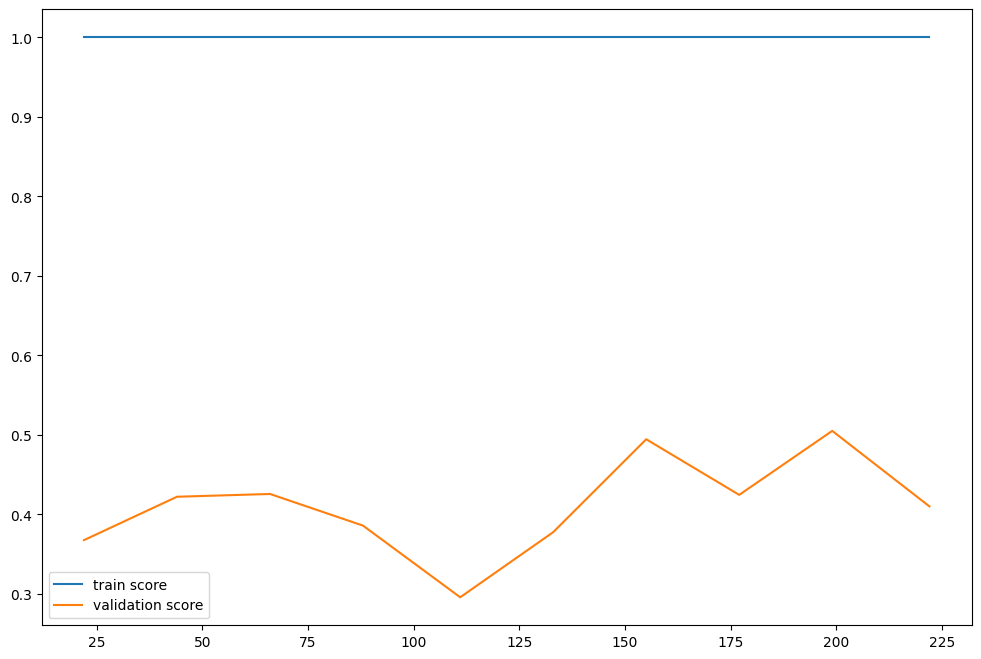

In [ ]:
evaluation(model_1)

# Precision la précision
# Recall le pourcentage d'individus détectés
# f1-score le rapport entre precision et recall, une bonne manière de voir la capacité du modèle à ne pas trouver
# trop de faux positifs et faux négatifs

# Essai 2

In [ ]:
def imputation(df):
    return  df.fillna(-999)

In [ ]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
X_train, y_train = preprocessing(trainset)

SARS-Cov-2 exam result
0    4068
1     447
Name: count, dtype: int64


In [ ]:
X_test, y_test = preprocessing(testset)

SARS-Cov-2 exam result
0    1018
1     111
Name: count, dtype: int64


In [ ]:
model_2 = DecisionTreeClassifier(random_state=0)

[[1011    7]
 [ 105    6]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1018
           1       0.46      0.05      0.10       111

    accuracy                           0.90      1129
   macro avg       0.68      0.52      0.52      1129
weighted avg       0.86      0.90      0.86      1129



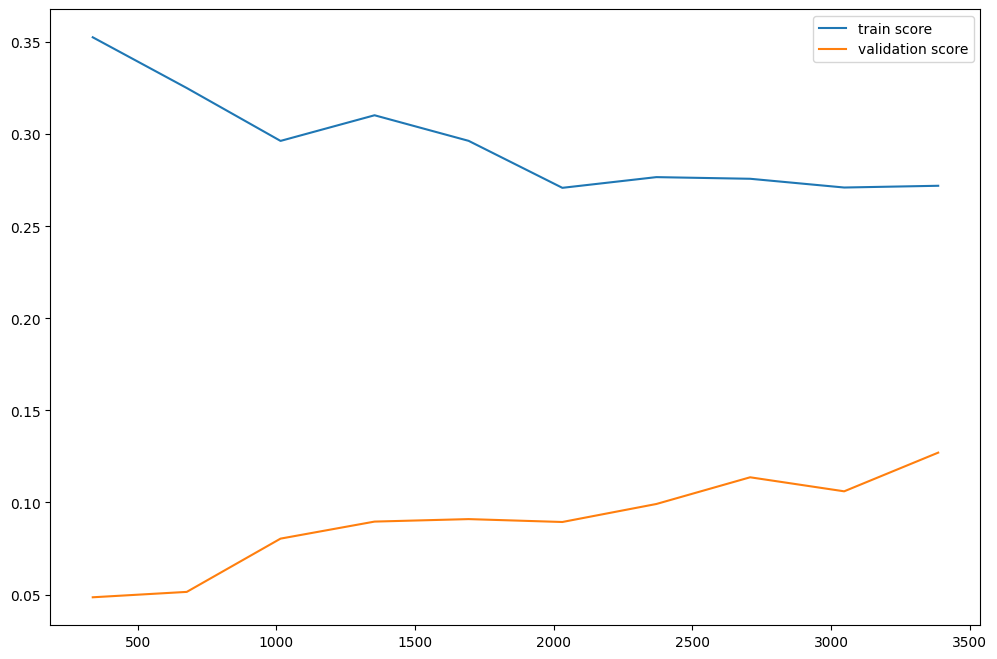

In [ ]:
evaluation(model_2)

# Essai 3

In [ ]:
def imputation(df):
    df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    return  df.fillna(-999)

In [ ]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
X_train, y_train = preprocessing(trainset)

SARS-Cov-2 exam result
0    4068
1     447
Name: count, dtype: int64


In [ ]:
X_test, y_test = preprocessing(testset)

SARS-Cov-2 exam result
0    1018
1     111
Name: count, dtype: int64


In [ ]:
model_3 = DecisionTreeClassifier(random_state=0)

[[1009    9]
 [ 105    6]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1018
           1       0.40      0.05      0.10       111

    accuracy                           0.90      1129
   macro avg       0.65      0.52      0.52      1129
weighted avg       0.86      0.90      0.86      1129



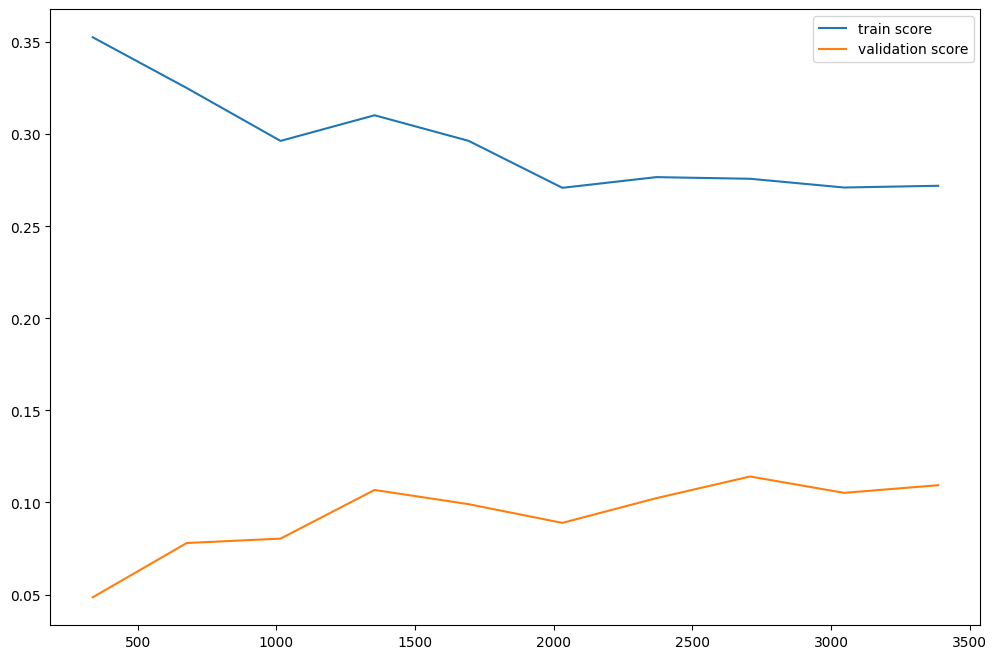

In [ ]:
evaluation(model_3)

# Essai 4

[[1009    9]
 [ 105    6]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1018
           1       0.40      0.05      0.10       111

    accuracy                           0.90      1129
   macro avg       0.65      0.52      0.52      1129
weighted avg       0.86      0.90      0.86      1129



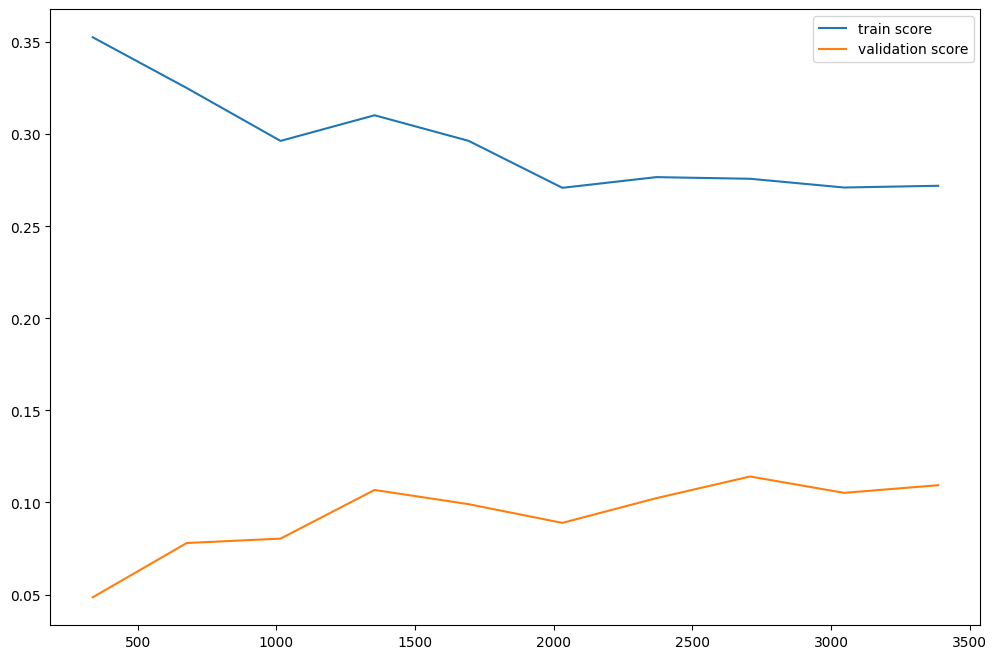

In [ ]:
evaluation(model_1)

<Axes: >

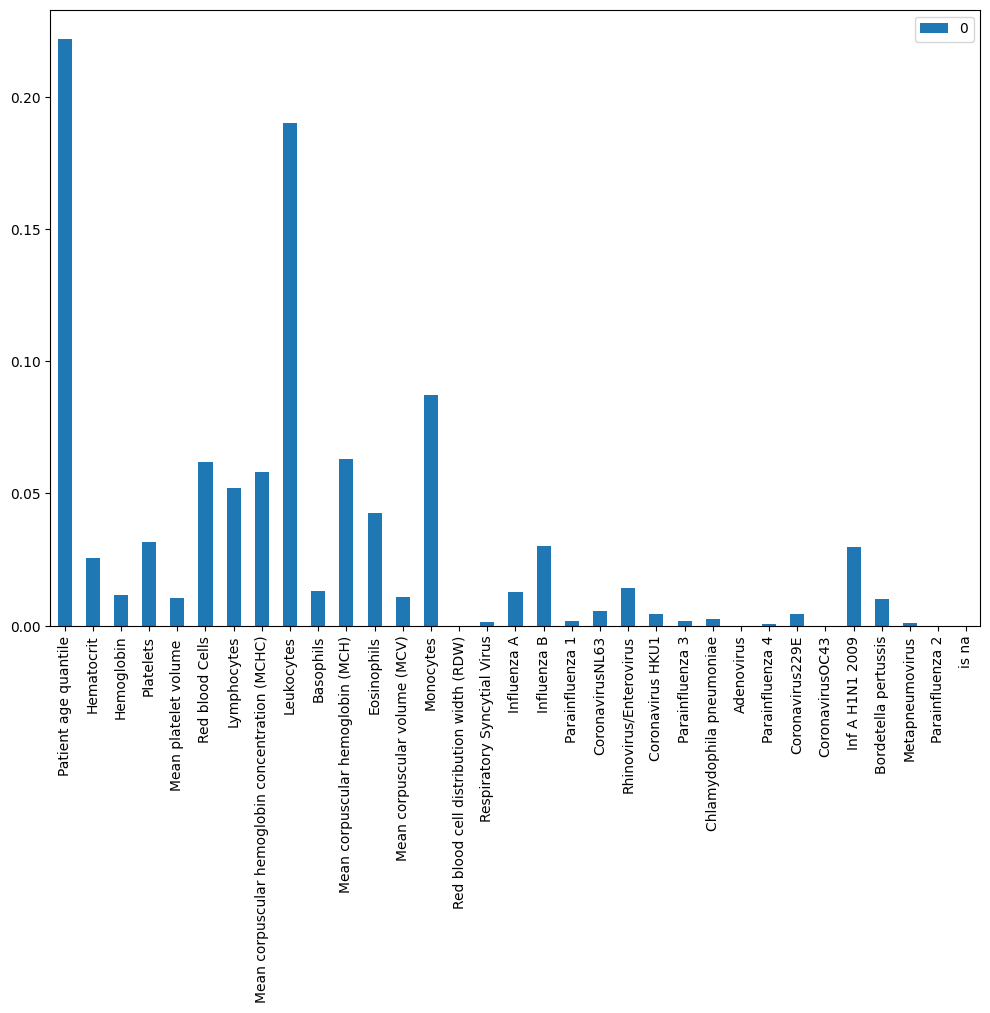

In [ ]:
# Observons l'importance de chaque feature pour notre modèle
pd.DataFrame(model_1.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

In [ ]:
df = df[key_columns + blood_columns]

In [ ]:
def imputation(df):
    return  df.dropna(axis=0)

In [ ]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
X_train, y_train = preprocessing(trainset)

SARS-Cov-2 exam result
0    422
1     65
Name: count, dtype: int64


In [ ]:
X_test, y_test = preprocessing(testset)

SARS-Cov-2 exam result
0    95
1    16
Name: count, dtype: int64


In [ ]:
model_4 = DecisionTreeClassifier(random_state=0)

[[87  8]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        95
           1       0.43      0.38      0.40        16

    accuracy                           0.84       111
   macro avg       0.66      0.65      0.65       111
weighted avg       0.83      0.84      0.83       111



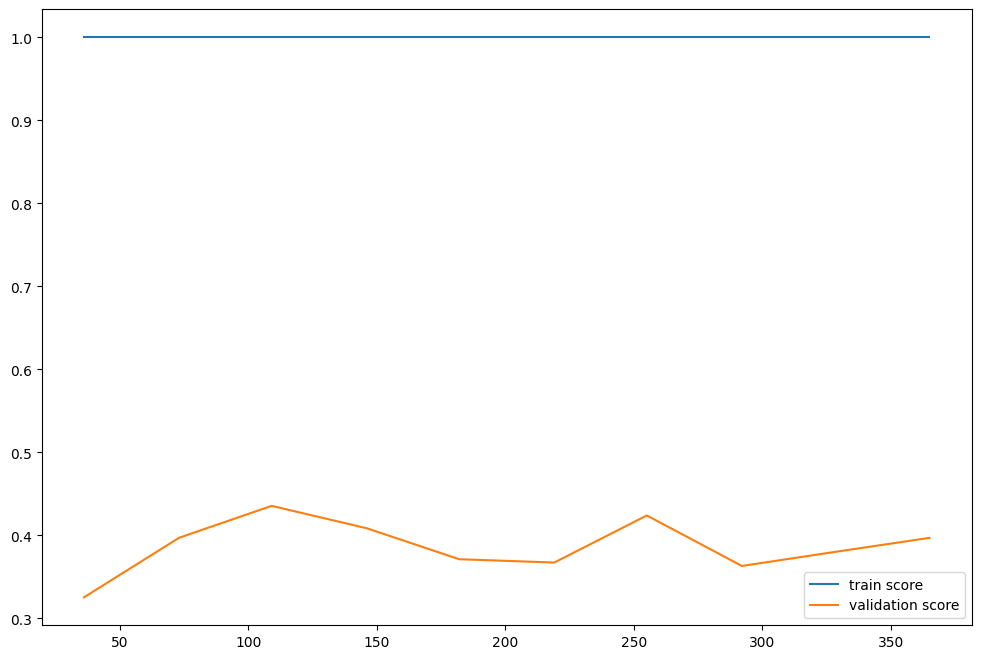

In [ ]:
evaluation(model_4)

# Essai 5

In [ ]:
df = data.copy()
df = df[key_columns + blood_columns + viral_columns]

In [ ]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
X_train, y_train = preprocessing(trainset)

SARS-Cov-2 exam result
0    258
1     38
Name: count, dtype: int64


In [ ]:
X_test, y_test = preprocessing(testset)

SARS-Cov-2 exam result
0    54
1    12
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_5 = RandomForestClassifier(random_state=0)

[[54  0]
 [11  1]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        54
           1       1.00      0.08      0.15        12

    accuracy                           0.83        66
   macro avg       0.92      0.54      0.53        66
weighted avg       0.86      0.83      0.77        66



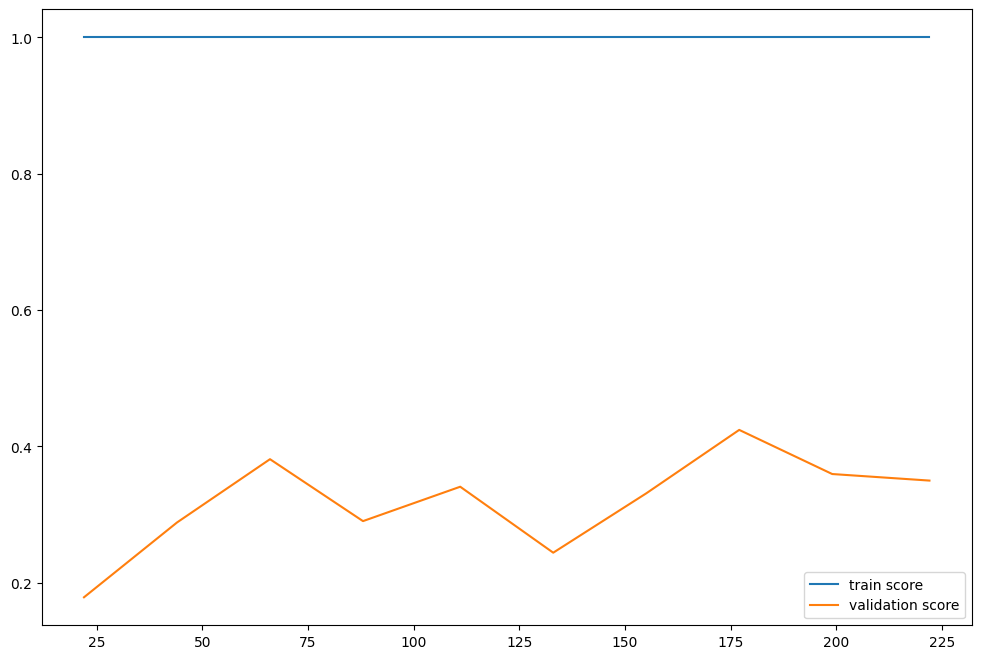

In [ ]:
evaluation(model_5)

<Axes: >

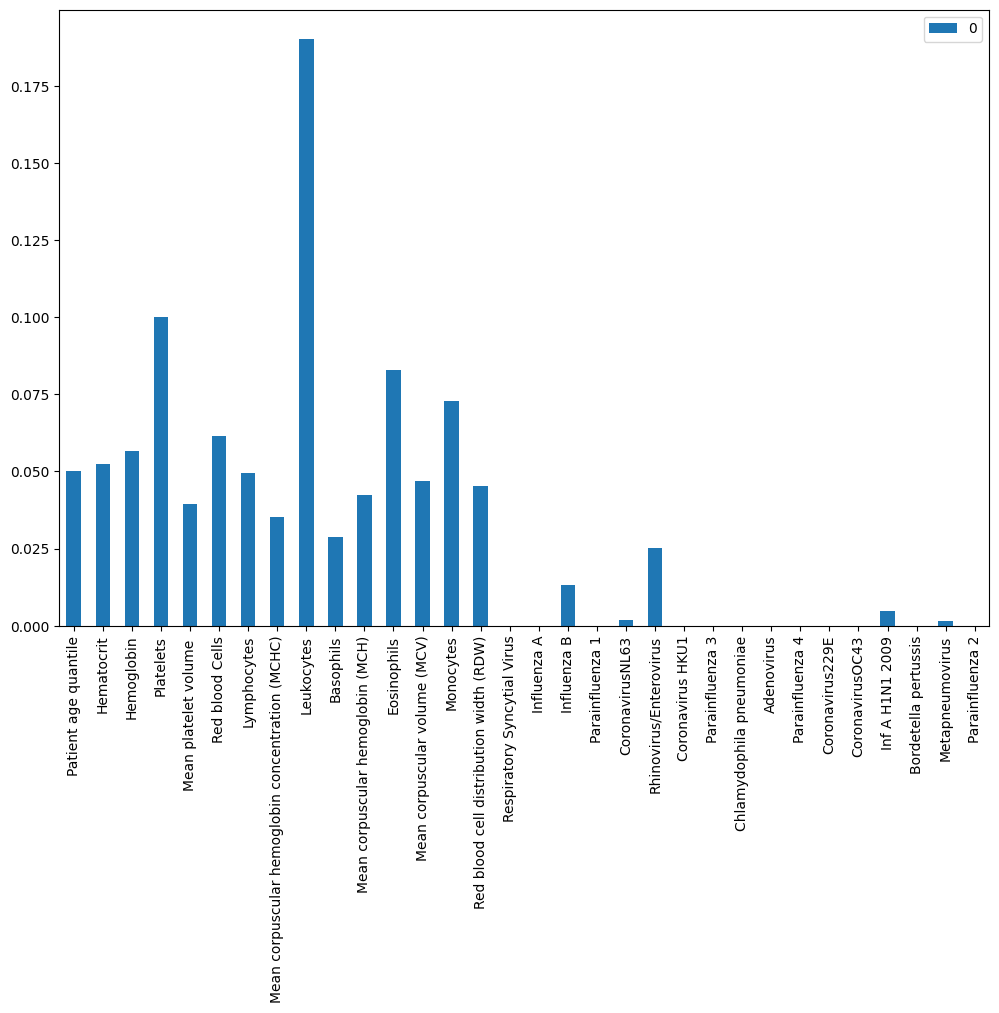

In [ ]:
# Observons l'importance de chaque feature pour notre modèle
pd.DataFrame(model_5.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

# Essai 6

In [ ]:
def feature_engineering(df):
    df['est malade'] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns, axis=1)
    return df

In [ ]:
def preprocessing(df):

    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)

    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']

    print(y.value_counts())

    return X, y

In [ ]:
df = data.copy()
df = df[key_columns + blood_columns + viral_columns]

In [ ]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
X_train, y_train = preprocessing(trainset)

SARS-Cov-2 exam result
0    422
1     65
Name: count, dtype: int64


In [ ]:
X_test, y_test = preprocessing(testset)

SARS-Cov-2 exam result
0    95
1    16
Name: count, dtype: int64


In [ ]:
model_6 = RandomForestClassifier(random_state=0)

[[92  3]
 [13  3]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        95
           1       0.50      0.19      0.27        16

    accuracy                           0.86       111
   macro avg       0.69      0.58      0.60       111
weighted avg       0.82      0.86      0.83       111



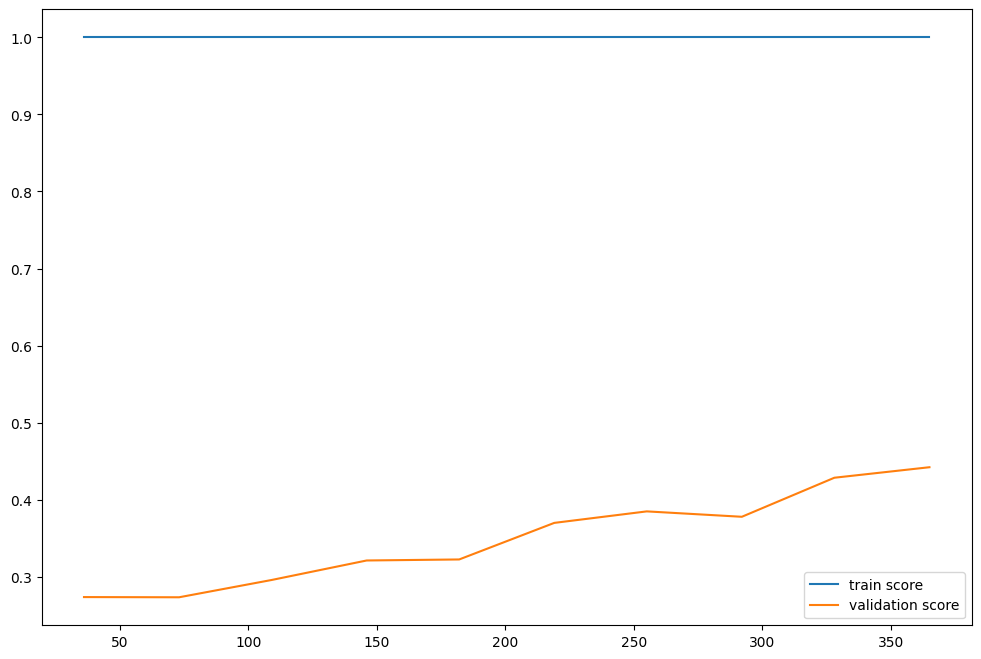

In [ ]:
evaluation(model_6)

<Axes: >

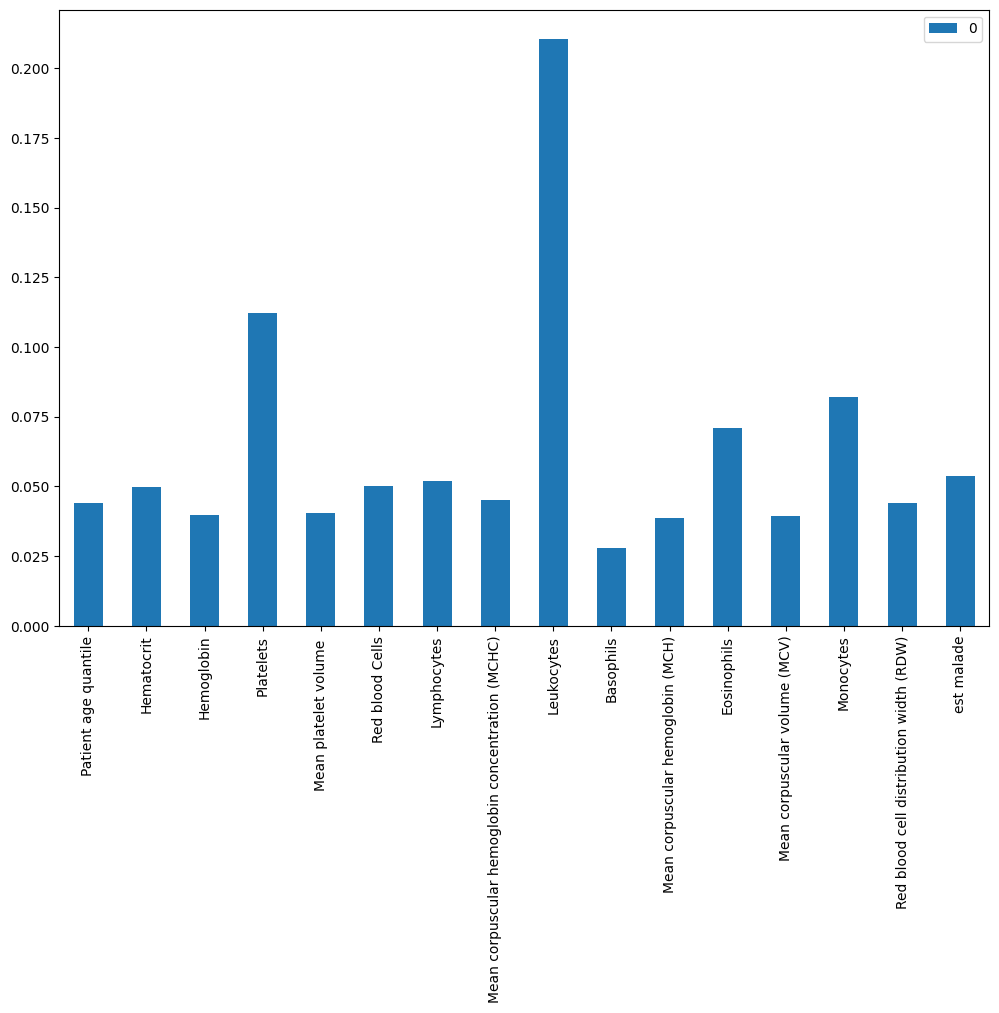

In [ ]:
# Observons l'importance de chaque feature pour notre modèle
pd.DataFrame(model_6.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

# Essai 7

On va créer un pipeline pour pouvoir faire ce SelectKBest en étant cohérent avec le traintest et le testset.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
df = data.copy()
df = df[key_columns + blood_columns + viral_columns]

In [ ]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
X_train, y_train = preprocessing(trainset)

SARS-Cov-2 exam result
0    422
1     65
Name: count, dtype: int64


In [ ]:
X_test, y_test = preprocessing(testset)

SARS-Cov-2 exam result
0    95
1    16
Name: count, dtype: int64


In [ ]:
model_7 = make_pipeline(SelectKBest(f_classif, k=4),
                      RandomForestClassifier(random_state=0))

[[90  5]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        95
           1       0.58      0.44      0.50        16

    accuracy                           0.87       111
   macro avg       0.75      0.69      0.71       111
weighted avg       0.86      0.87      0.87       111



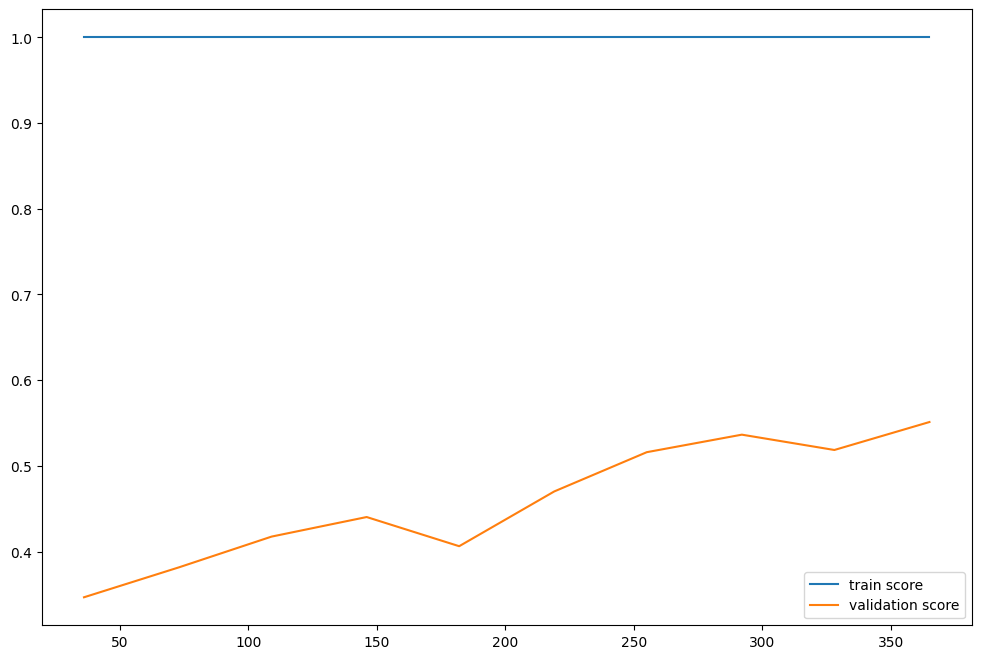

In [ ]:
evaluation(model_7)

# Essai 8

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [ ]:
df = data.copy()
df = df[key_columns + blood_columns + viral_columns]

In [ ]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
X_train, y_train = preprocessing(trainset)

SARS-Cov-2 exam result
0    422
1     65
Name: count, dtype: int64


In [ ]:
X_test, y_test = preprocessing(testset)

SARS-Cov-2 exam result
0    95
1    16
Name: count, dtype: int64


In [ ]:
model_8 = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=0))

[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111



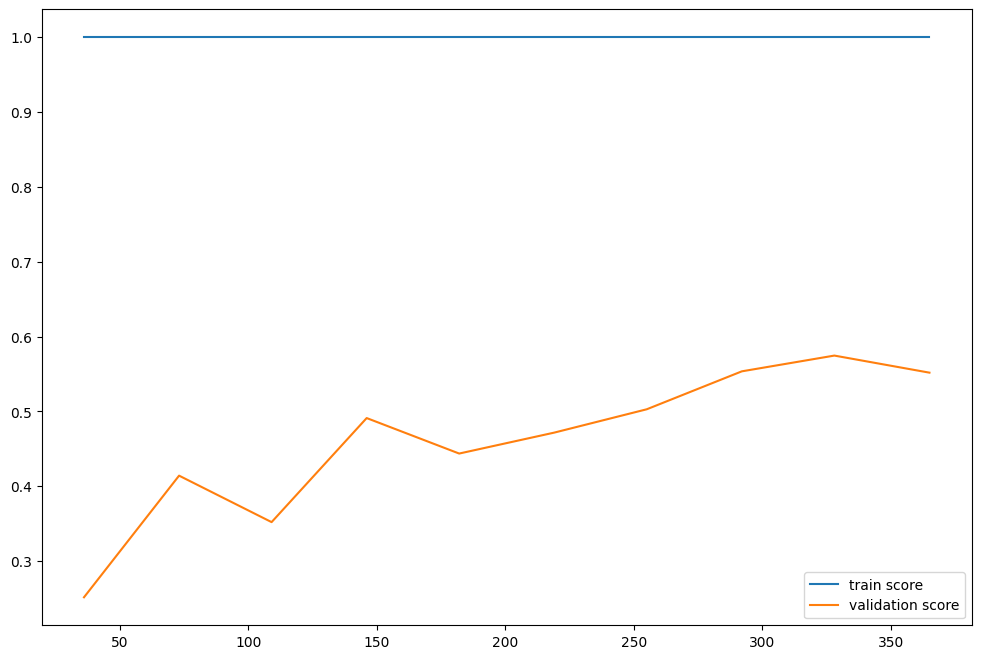

In [ ]:
evaluation(model_8)